In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
import warnings
warnings.filterwarnings('ignore')

# load dataset
ds_path = '/kaggle/input/common-voice/cv-valid-train'
df = pd.read_csv("/kaggle/input/common-voice/cv-valid-train.csv") 
df_gen = df[df['gender'].notna()]
df.head()

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1,0,NaN,NaN,NaN,NaN
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1,0,NaN,NaN,NaN,NaN
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1,0,NaN,NaN,NaN,NaN
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1,0,NaN,NaN,NaN,NaN
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3,2,NaN,NaN,NaN,NaN


In [5]:
df['gender'].value_counts()

male      55029
female    18249
other       781
Name: gender, dtype: int64

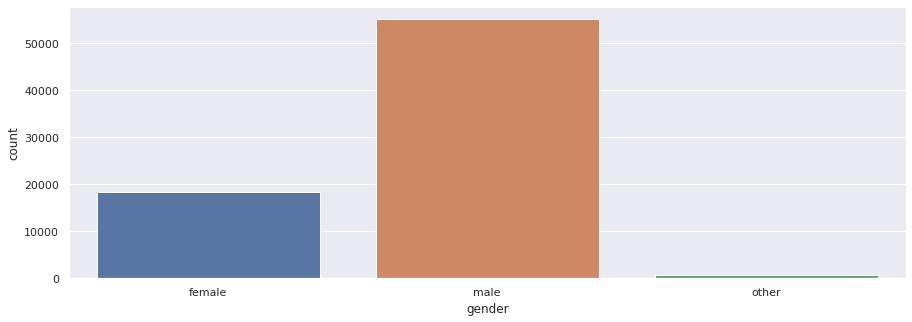

In [10]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="gender", 
        data=df[df['gender'].notna()])

plt.show()


In [12]:
#we extract the columns that we think useful are
data = df[['filename','gender']]
data.reset_index(inplace=True, drop=True)
data.head()

,filename,gender
0,cv-valid-train/sample-000000.mp3,NaN
1,cv-valid-train/sample-000001.mp3,NaN
2,cv-valid-train/sample-000002.mp3,NaN
3,cv-valid-train/sample-000003.mp3,NaN
4,cv-valid-train/sample-000004.mp3,NaN


In [13]:
data = data[data['gender'].isin(['male', 'female'])]

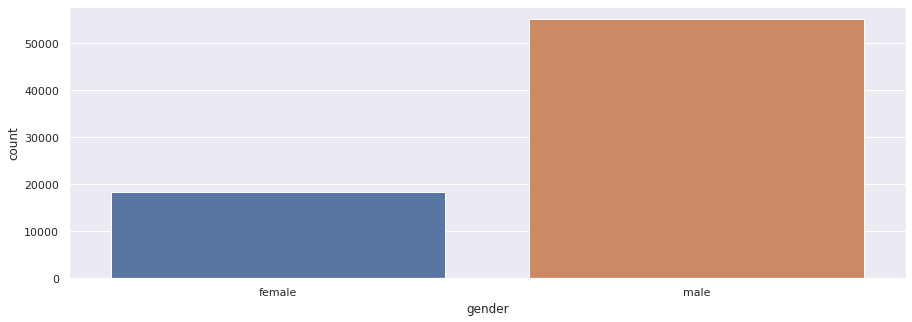

In [14]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="gender", 
        data=data[data['gender'].notna()])

plt.show()


### **Feature Engineering**
#### **Feature Extraction**

In [16]:
#the function create dataframe to store the feature and label related to each other
def create_df_features(orig):
    new_rows = list()
    tot_rows = len(orig)-1
    
    for idx, row in orig.iterrows():
        print("\r", end="")
        print("{}/{}".format(idx, tot_rows), end="", flush=True)
        features = feature_extraction(row['filename'])
        # features.append(row['age'])
        new_rows.append(features)

    return pd.DataFrame(new_rows, columns=["gender", "spectral_centroid", "spectral_bandwidth", "spectral_rolloff",
                                    "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8",
                                   "mfcc9", "mfcc10", "mfcc11", "mfcc12", "mfcc13", "mfcc14", "mfcc15", "mfcc16",
                                   "mfcc17", "mfcc18", "mfcc19", "mfcc20"])

df_features = create_df_features(data)
# df_features = pd.read_csv('/kaggle/input/version-2/df_features.csv')
# df_features = df_features.iloc[:,1:]
df_features.head()

,gender,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,female,2679.939570,3347.669489,5745.486746,-625.218140,111.320938,6.326994,34.757614,31.619902,-4.714646,...,-3.741118,-10.702963,-11.202637,-12.003523,-8.489580,-5.463276,-4.954216,-3.715198,-6.330529,-6.338474
1,male,2859.467798,2576.661658,4912.241181,-469.897675,126.299873,-16.546749,3.553606,2.178286,13.770478,...,-5.596651,-10.987110,1.146530,6.103549,-1.724739,-1.226475,-6.429199,-7.261916,-4.788060,-3.121077
2,female,1976.049163,1830.611037,3344.301008,-418.205048,147.668320,-49.972744,-2.285532,37.187012,-8.904264,...,-3.505918,-13.845863,-9.927489,-7.871619,-5.473860,-2.295655,-6.554991,-5.206915,-0.407431,-3.882371
3,male,2333.782018,2533.276030,4398.731436,-464.911224,118.436134,19.749298,27.143938,26.439018,2.309576,...,-7.227703,-5.458494,-2.907650,-4.495940,-2.715732,-0.079106,-5.292980,-5.866175,0.601412,-3.376775
4,male,2351.958974,2974.758775,4743.172457,-343.828766,157.151779,7.660183,41.900478,-15.153757,28.925409,...,0.814860,0.101646,6.319596,-1.603062,3.837600,-2.643968,2.324787,-1.382977,3.790324,-3.534813


In [ ]:
df_features.to_csv('/kaggle/working/df_features.csv')

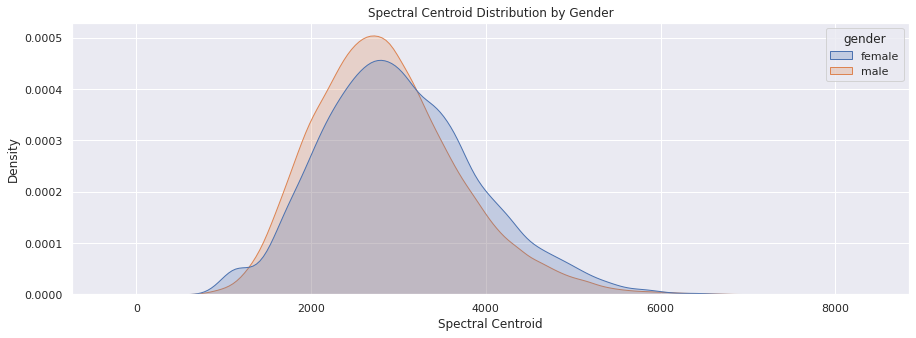

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df_features, x="spectral_centroid", hue="gender", fill=True, common_norm=False)
plt.title("Spectral Centroid Distribution by Gender")
plt.xlabel("Spectral Centroid")
plt.ylabel("Density")
plt.show()


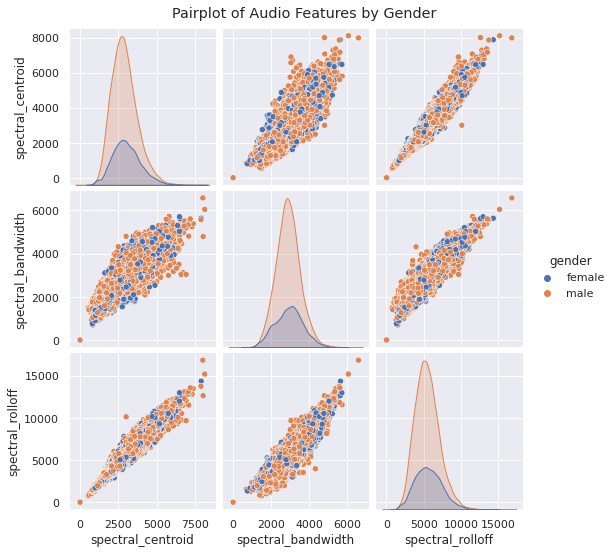

In [12]:
sns.pairplot(df_features, hue="gender", vars=["spectral_centroid", "spectral_bandwidth", "spectral_rolloff"])
plt.suptitle("Pairplot of Audio Features by Gender", y=1.02)
plt.show()


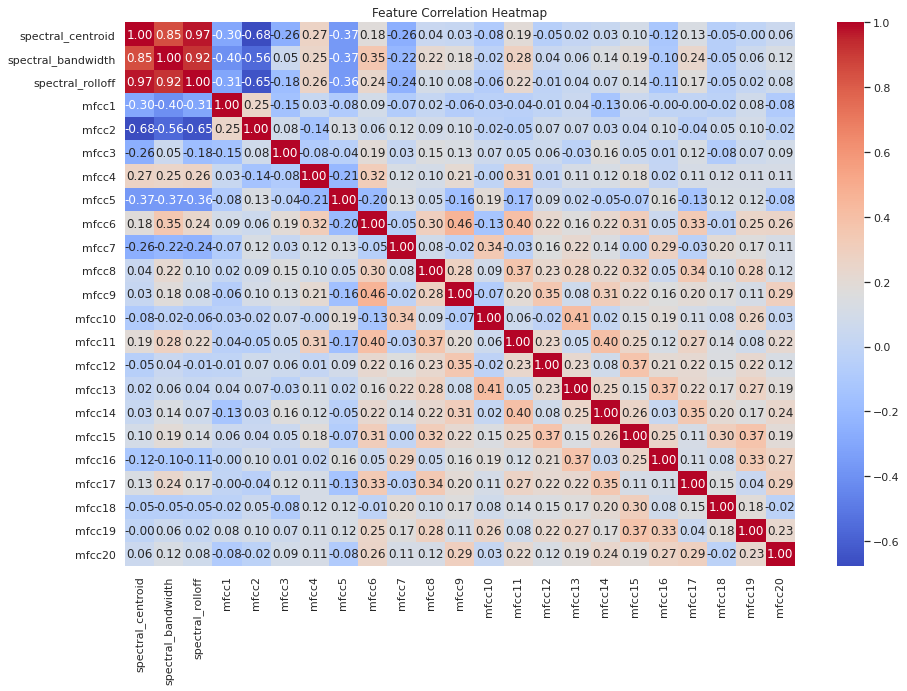

In [18]:
import numpy as np

# Compute correlation matrix
corr_matrix = df_features.drop(columns=["gender"]).corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()


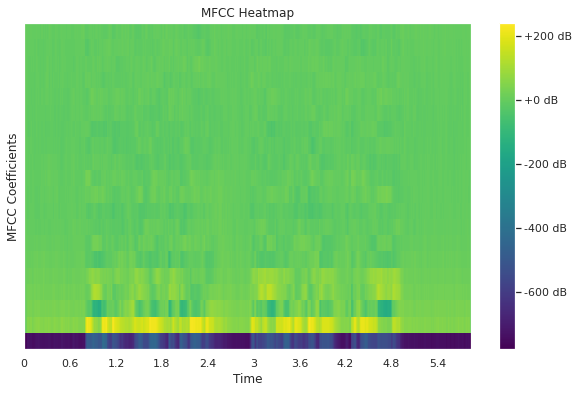

In [21]:
# MFCC example for a single audio file
import librosa.display

audio, _ = librosa.load(f"{ds_path}/{data.iloc[0]['filename']}", sr=48000)
mfcc = librosa.feature.mfcc(y=audio, sr=48000)

plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc, x_axis="time", sr=48000, cmap="viridis")
plt.colorbar(format="%+2.0f dB")
plt.title("MFCC Heatmap")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()


### **Feature Transformation**  


In [22]:
from sklearn.preprocessing import StandardScaler

def scale_features(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(np.array(data.iloc[:, 1:], dtype = float))
        
    return scaled_data, scaler

x, scaler = scale_features(df_features)

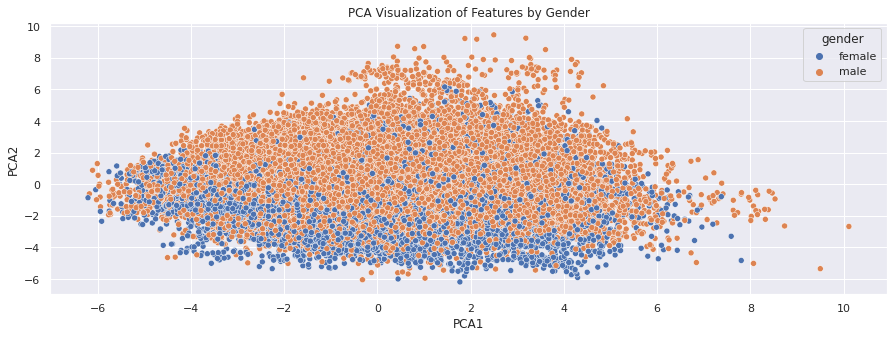

In [23]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)
df_features["PCA1"] = pca_result[:, 0]
df_features["PCA2"] = pca_result[:, 1]

# Scatter plot
sns.scatterplot(data=df_features, x="PCA1", y="PCA2", hue="gender")
plt.title("PCA Visualization of Features by Gender")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [ ]:
# df_features.head()

In [26]:
from sklearn.preprocessing import LabelEncoder

def get_labels(data):
    labels = data.iloc[:, 0]
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    return labels, encoder

y, encoder = get_labels(df_features)
classes = encoder.classes_
print("Before encoding:", df_features.iloc[0].values[0])
print("\nAfter encoding:", y[0])
print("\nClasses:", classes)

Before encoding: female

After encoding: 0

Classes: ['female' 'male']


As we saw previously, the dataset is imbalanced. Here we apply oversampling for the under-represented class (class 'female' in our case)

In [41]:
#Resample using SMOT
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x, y)

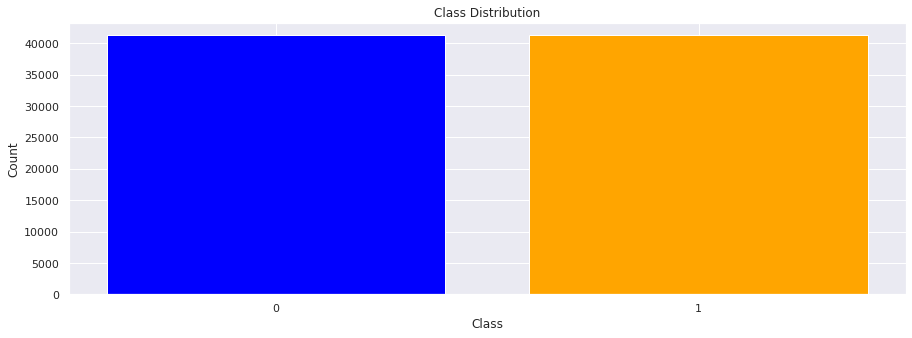

In [40]:
unique, counts = np.unique(y_resampled, return_counts=True)


# Plot the bar chart
plt.bar(unique, counts, color=['blue', 'orange'])
plt.xticks(unique)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

### **Feature Selection**  

We use the ANOVA (ANalysis Of VAriance) statistical technique (f_classif) to select the best 22 features.


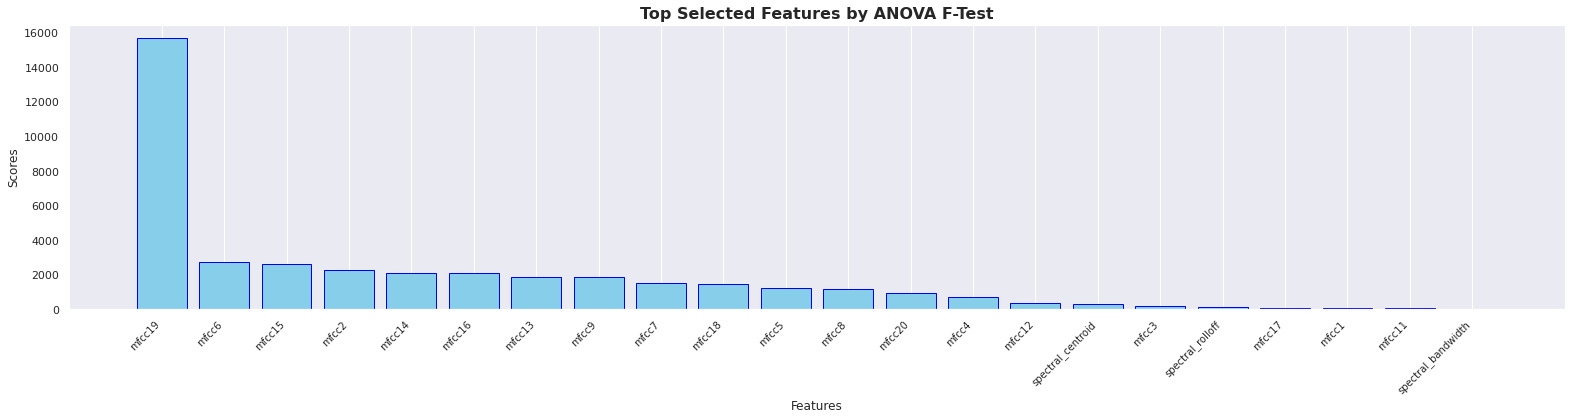

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import numpy as np

# Define the number of features to select
num_features = 22

# Perform feature selection using ANOVA F-test
feature_selector = SelectKBest(score_func=f_classif, k=num_features)
feature_selector.fit(x, y)

# Transform the dataset
x_selected = feature_selector.transform(x)

# Get the feature scores and sort them in descending order
feature_scores = feature_selector.scores_
sorted_indices = np.argsort(feature_scores)[::-1]

# Retrieve feature names and their scores
selected_features = [df_features.columns[idx + 1] for idx in sorted_indices[:num_features]]
selected_scores = feature_scores[sorted_indices[:num_features]]

# Plot the feature importance
plt.figure(figsize=(22, 6))
plt.bar(selected_features, selected_scores, color='skyblue', edgecolor='blue')
plt.title('Top Selected Features by ANOVA F-Test', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### **Model Selection**  

Here, we compare between two classifiers:

- Support Vector Machine (SVM)  
- Random Forest  

The performance of these classifiers is assessed using the K-Fold Cross-Validation method. During each iteration of the outer cross-validation loop, we optimize the hyperparameters of the classifiers using an additional inner cross-validation loop, which splits the training set further into training and validation subsets.

For each iteration of the outer cross-validation, we record the F1-Score achieved by the tuned classifier on the validation data, as well as the F1-Score calculated on the test data. Finally, we compute and display the average F1-Scores obtained on the test data across all iterations of the outer cross-validation process.

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import numpy as np
import torch
import time
from datetime import datetime, timedelta

# Check if CUDA is available
if torch.cuda.is_available():
    print("GPU is available! Using CUDA device:", torch.cuda.get_device_name(0))
    device = torch.device("cuda")
else:
    print("No GPU available. Using CPU.")
    device = torch.device("cpu")

def to_gpu(X, y):
    X_tensor = torch.FloatTensor(X)
    y_tensor = torch.LongTensor(y)
    return X_tensor.to(device), y_tensor.to(device)

def format_time(seconds):
    """Convert seconds to a human-readable format"""
    return str(timedelta(seconds=int(seconds)))

def estimate_total_time(params_dict):
    """Estimate total number of combinations for GridSearch"""
    total = 1
    for param_values in params_dict.values():
        total *= len(param_values)
    return total

classifiers_and_params = [
    (SVC(), {
        'C': [50, 100, 150, 200, 300],
        'gamma': ['auto', 'scale'],
        'kernel': ['rbf', 'linear', 'poly'],
        'degree': [2, 3, 4],
        'class_weight': ['balanced', None],
        'probability': [True],
        'random_state': [42]
    }),
    (RandomForestClassifier(), {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True, False],
        'class_weight': ['balanced', 'balanced_subsample', None],
        'random_state': [42]
    })
]

for tup in classifiers_and_params:
    print("\n{} Results:".format(tup[0].__class__.__name__))
    print("-" * 50)
    
    # Calculate total combinations
    total_combinations = estimate_total_time(tup[1])
    print(f"Total parameter combinations to try: {total_combinations}")
    
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)
    fold_counter = 0
    test_results = list()
    train_results = list()
    fold_times = list()
    
    total_start_time = time.time()
    
    for train_idx, test_idx in outer_cv.split(X_new):
        fold_counter += 1
        fold_start_time = time.time()
        
        print(f"\nFold {fold_counter}")
        print("-" * 20)
        
        X_train, X_test = X_new[train_idx], X_new[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        X_train_gpu, y_train_gpu = to_gpu(X_train, y_train)
        X_test_gpu, y_test_gpu = to_gpu(X_test, y_test)
        
        inner_cv = KFold(n_splits=2, shuffle=True, random_state=0)
        
        # Time the GridSearch fit
        fit_start_time = time.time()
        gs = GridSearchCV(
            tup[0], 
            tup[1], 
            scoring='f1_macro',
            cv=inner_cv,
            refit=True,
            n_jobs=-1,
            verbose=1
        )
        
        res = gs.fit(X_train_gpu.cpu().numpy(), y_train_gpu.cpu().numpy())
        fit_time = time.time() - fit_start_time
        
        best_model = res.best_estimator_
        
        # Evaluate
        train_pred = best_model.predict(X_train_gpu.cpu().numpy())
        train_score = f1_score(y_train_gpu.cpu().numpy(), train_pred, average='macro')
        train_results.append(train_score)
        
        test_pred = best_model.predict(X_test_gpu.cpu().numpy())
        test_score = f1_score(y_test_gpu.cpu().numpy(), test_pred, average='macro')
        test_results.append(test_score)
        
        # Calculate timing for this fold
        fold_time = time.time() - fold_start_time
        fold_times.append(fold_time)
        
        # Print results with timing information
        print("\nTiming Information:")
        print(f"GridSearch fit time: {format_time(fit_time)}")
        print(f"Total fold time: {format_time(fold_time)}")
        print(f"Average time per parameter combination: {format_time(fit_time/total_combinations)}")
        
        if fold_counter == 1:
            # Estimate total time remaining
            estimated_total = fold_time * 3  # 3 folds total
            print(f"\nEstimated total time for all folds: {format_time(estimated_total)}")
            print(f"Estimated completion time: {datetime.now() + timedelta(seconds=estimated_total)}")
        
        print("\nResults:")
        print("Best Parameters:", res.best_params_)
        print(f"Training F1 Score: {train_score:.3f}")
        print(f"Validation F1 Score: {res.best_score_:.3f}")
        print(f"Test F1 Score: {test_score:.3f}")
    
    total_time = time.time() - total_start_time
    
    print("\nOverall Results:")
    print("-" * 20)
    print(f"Average Training F1 Score: {np.mean(train_results):.3f} ± {np.std(train_results):.3f}")
    print(f"Average Test F1 Score: {np.mean(test_results):.3f} ± {np.std(test_results):.3f}")
    print(f"\nTiming Summary:")
    print(f"Total execution time: {format_time(total_time)}")
    print(f"Average time per fold: {format_time(np.mean(fold_times))}")
    print(f"Average time per parameter combination: {format_time(np.mean(fold_times)/total_combinations)}")
    print("\n")

In [21]:
import itertools
import matplotlib.pyplot as plt

def my_plot_confusion_matrix(cm, classes, normalize=False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix (without normalization)"
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title(title)

    thresh = cm.max() / 2.
    fmt = "{:0.2f}" if normalize else "{:d}"
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, fmt.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


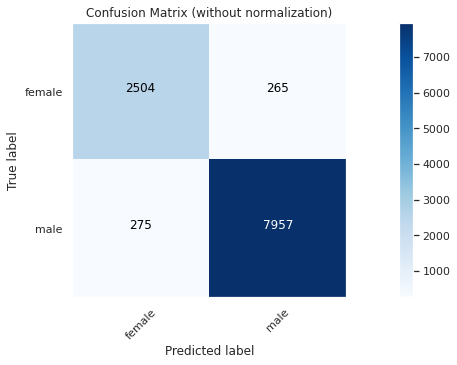

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

model = SVC(C=100, gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure()
my_plot_confusion_matrix(cm, classes=classes)

plt.grid(False)
plt.show()

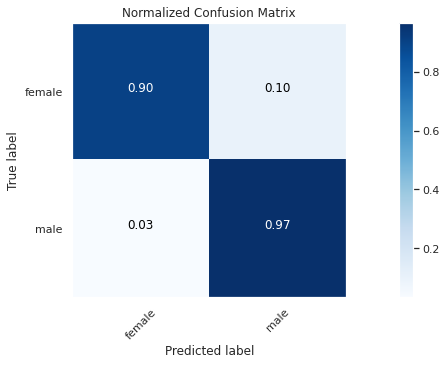

In [23]:
# Plot normalized confusion matrix
plt.figure()
my_plot_confusion_matrix(cm, classes=classes, normalize=True)

plt.grid(False)
plt.show()



In [ ]:
import joblib
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)